In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.count()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [5]:
#Drop column and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [6]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
#Count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0, 'spam':1})
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
label        5572 non-null object
text         5572 non-null object
label_num    5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


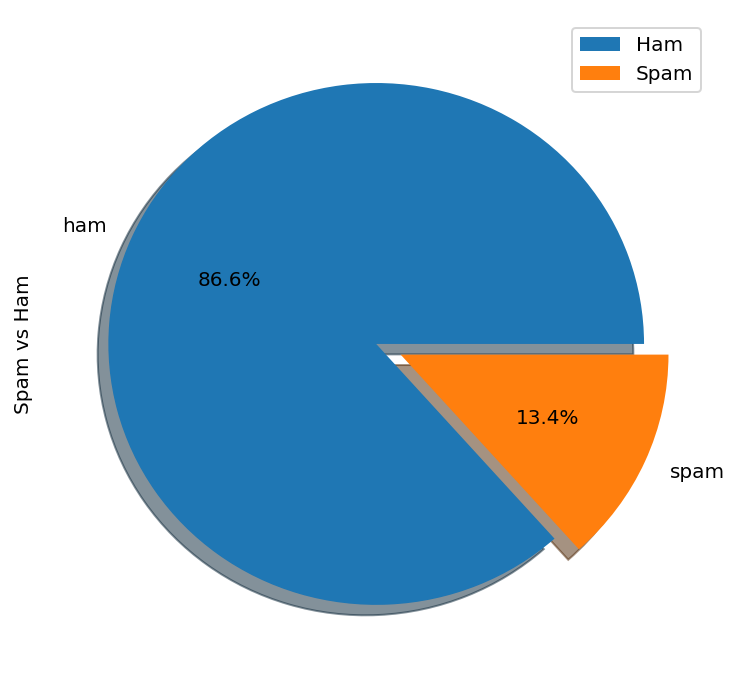

In [11]:
data["label"].value_counts().plot(kind = 'pie', 
                                  explode = [0, 0.1], figsize = (6, 6), 
                                  autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [12]:
#Count of text apperance; ie, number of times the same text appears
topMessages = data.groupby("text")["label"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


A lot of messages are actually not spam. About 86% of our dataset consists of normal messages.

While we split our data set into train and test or when we use cross validation, we will have to use stratified sampling, otherwise we have a chance of our training model being skewed towards normal messages. If the sample we choose to train our model consists majorly of normal messages, it may end up predicting everything as ham and we might not be able to figure this out since most of the messages we get are actually ham and will have a pretty good accuracy.

A very basic model would be a model that predicts everything as ham. It would have a decent accuracy. But then again, is that right? No. We will then have to use an accuracy metric that keeps this in mind. Goal : We don't mind if we miss the odd spam message but we surely don't want to mark a ham message as spam i.e Precision is very important. Hence we will use fbeta score as our accuracy metric with inclination towards Precision

In [13]:
# Text Preprocessing
import nltk
#nltk.download("all")
#nltk.dowload('punkt')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize


In [14]:
spam_messages = data[data["label"] == "spam"]["text"]
ham_messages = data[data["label"] == "ham"]["text"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 
# This will also remove the not word in something like can't etc. 
# In a sentiment analysis setting, its better to use 
# sentence.translate(string.maketrans("", "", ), chars_to_remove)

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") 
             and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") 
             and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
7       None
10      None
13      None
14      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
35      None
36      None
37      None
38      None
        ... 
5538    None
5539    None
5541    None
5542    None
5543    None
5544    None
5545    None
5546    None
5548    None
5549    None
5550    None
5551    None
5552    None
5553    None
5554    None
5555    None
5556    None
5557    None
5558    None
5559    None
5560    None
5561    None
5562    None
5563    None
5564    None
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [15]:
from wordcloud import WordCloud

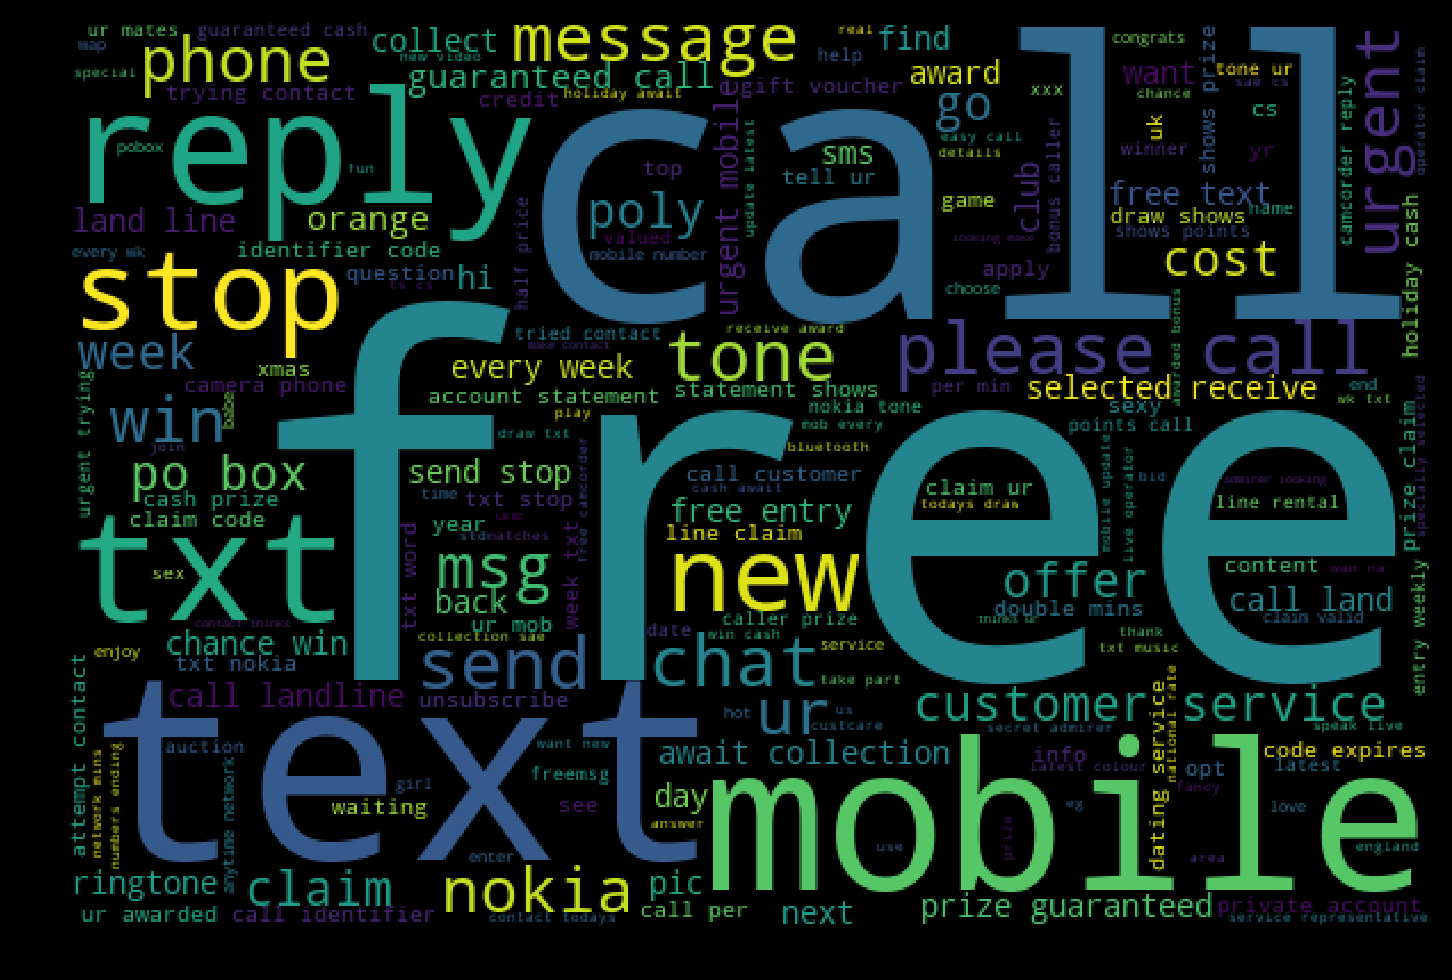

In [16]:
#Spam Word cloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

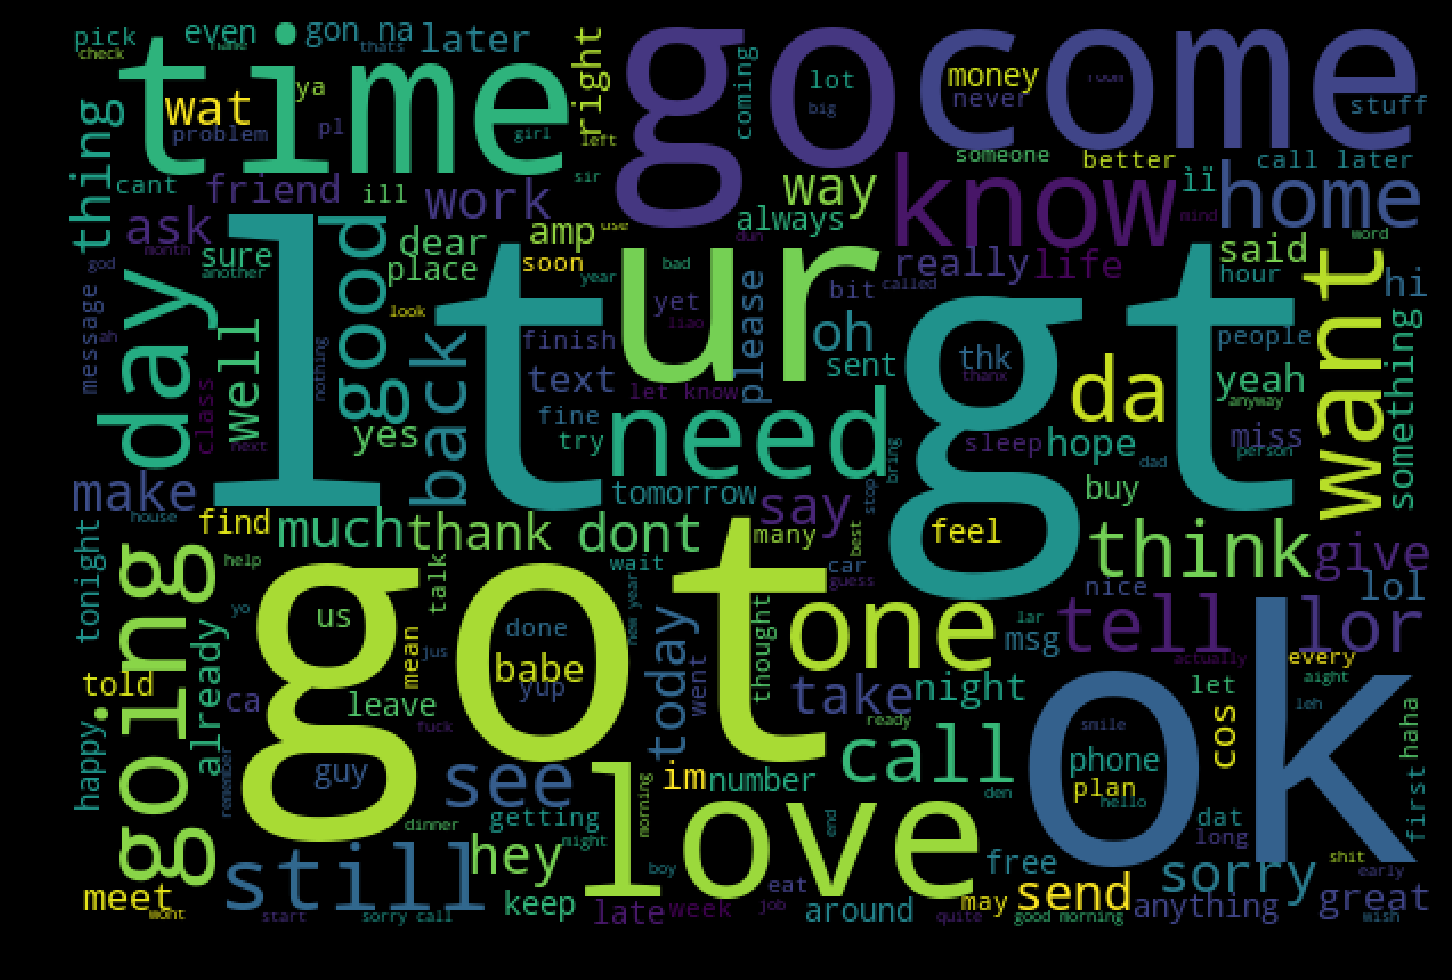

In [17]:
#Ham Word cloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [18]:
# Top 10 spam words

spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 Spam words are :



call      346
free      217
txt       156
ur        144
u         144
mobile    123
text      121
stop      114
claim     113
reply     104
dtype: int64

In [19]:
# Top 10 Ham words

ham_words = np.array(ham_words)
print("Top 10 Ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 Ham words are :



u       974
gt      318
lt      316
get     301
go      246
ok      246
got     242
ur      237
know    234
like    231
dtype: int64

In [20]:
#length of the message
data["messageLength"] = data["text"].apply(len)
data["messageLength"].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: messageLength, dtype: float64

In [21]:
data['len'] = data['text'].apply(lambda x : len(x) - x.count(" "))
data['len'].describe()

count    5572.000000
mean       65.512024
std        48.629795
min         2.000000
25%        29.000000
50%        50.000000
75%        98.000000
max       740.000000
Name: len, dtype: float64

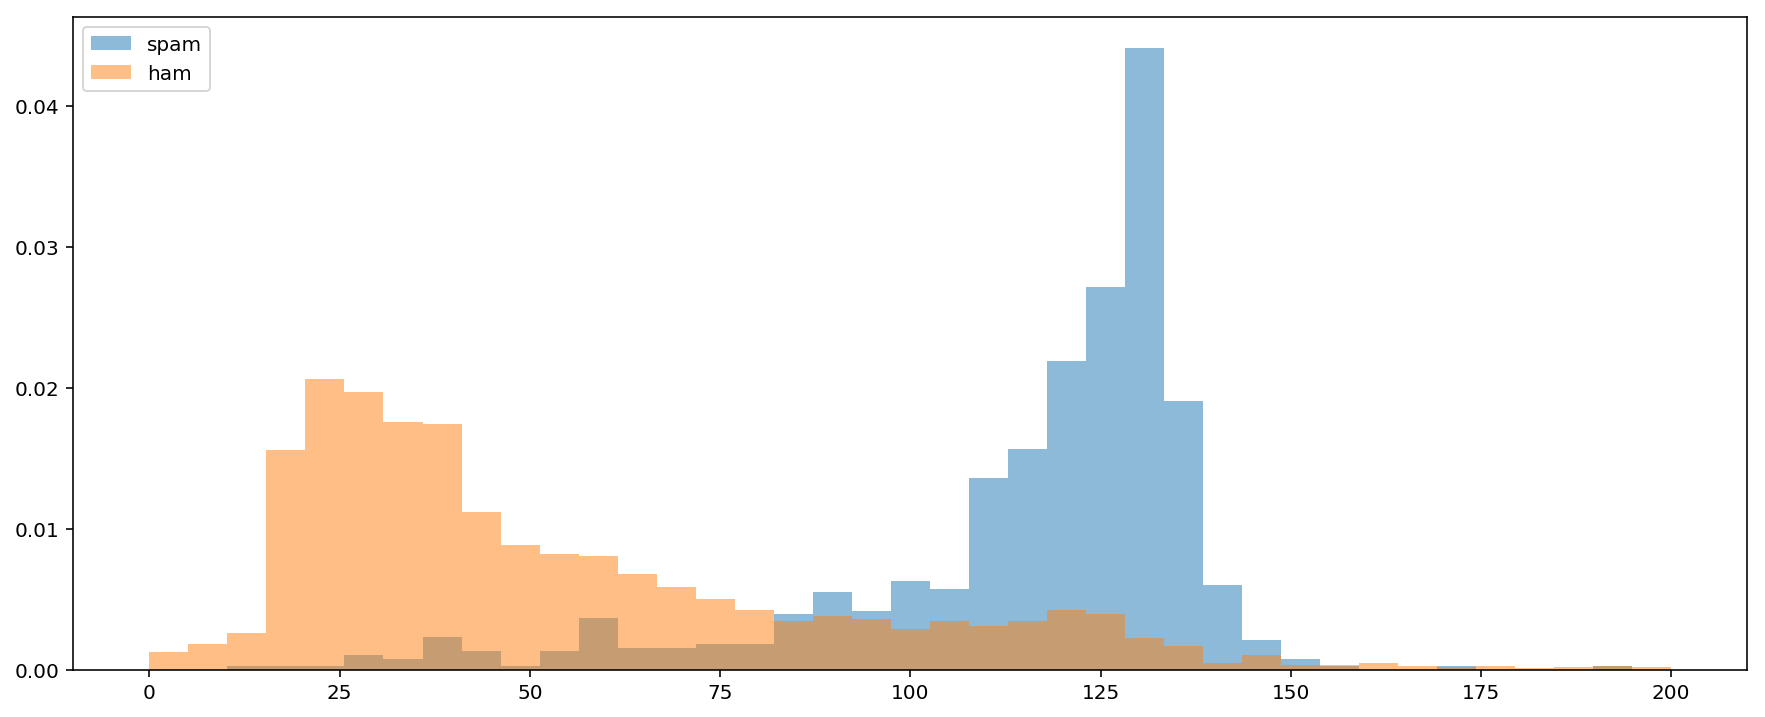

In [22]:
from matplotlib import pyplot
%matplotlib inline

pyplot.figure(figsize=(15,6))

bins = np.linspace(0,200,num=40)
pyplot.hist(data[data['label']=='spam']['len'],bins,alpha=0.5,label='spam',normed=True)
pyplot.hist(data[data['label']=='ham']['len'],bins,alpha =0.5,label ='ham', normed=True)
pyplot.legend(loc ='upper left')
pyplot.show()

Spam appears longer. This may make a good predictor(?)

In [23]:
import re

data['long_number'] = data['text'].apply(lambda x : len(re.findall('\d{7,}',x)))
data['short_number'] = data['text'].apply(lambda x : len(re.findall('\d{4,6}',x))) ## try with{,6}

import string

def count_punct (text):
    count = sum([1 for x in text if x in string.punctuation])
    pp = round(100*count/(len(text)-text.count(" ")),3)
    return pp

data['punct'] = data['text'].apply(lambda x : count_punct(x))

def  website (text):
    if (len(re.findall('www|http|com|\.co',text))>0):
        return 1
    else:
        return 0
    
data['website'] = data['text'].apply(lambda x : website(x))

testlink = "hello buddwwy http how com are you.co ww ww."
print(website(testlink))


1


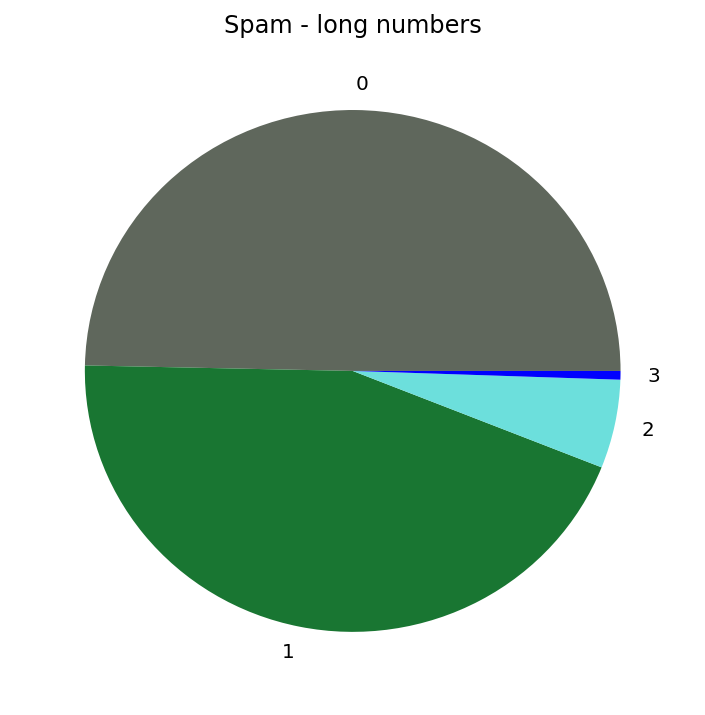

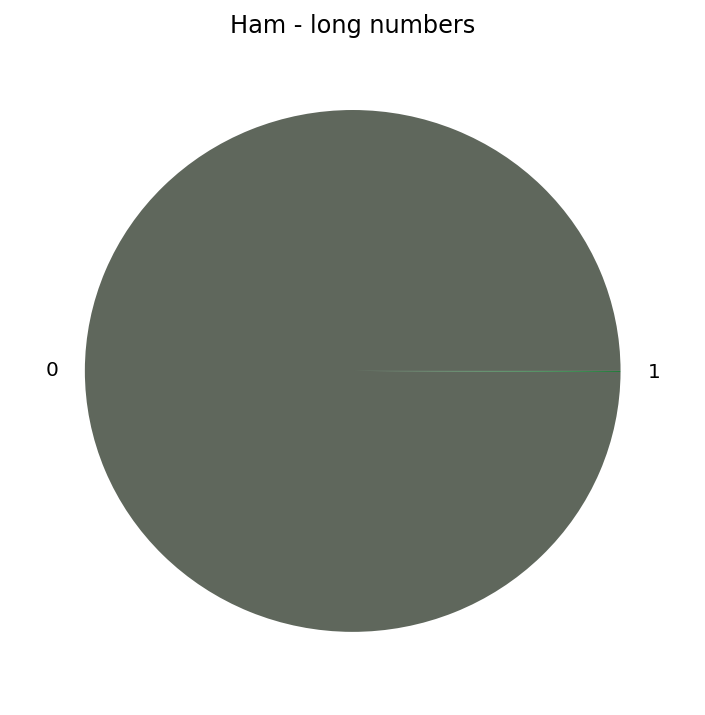

In [24]:
# Numbers

pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='spam']['long_number'].value_counts(),labels=['0','1','2','3'], 
           colors=['#5f675c','#197632','#6cdfdc','blue'],)
pyplot.title("Spam - long numbers")
pyplot.show()


pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='ham']['long_number'].value_counts(),labels=['0','1'], 
           colors=['#5f675c','#197632'],)
pyplot.title("Ham - long numbers")
pyplot.show()

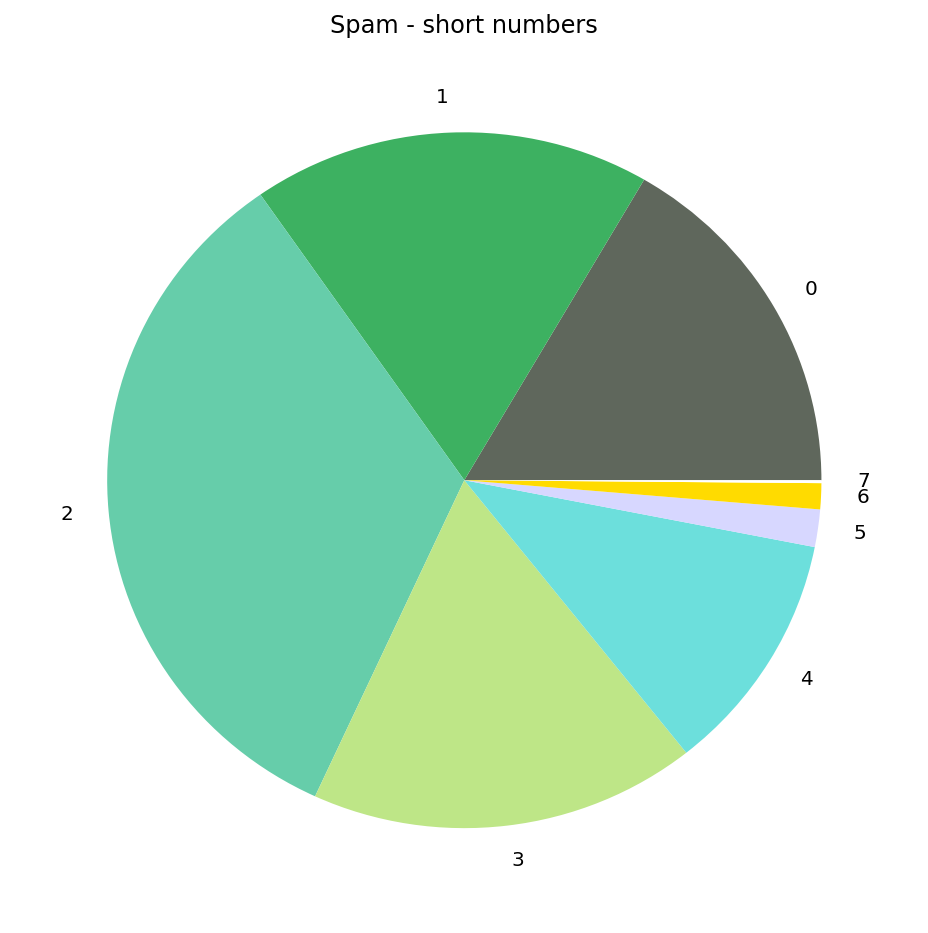

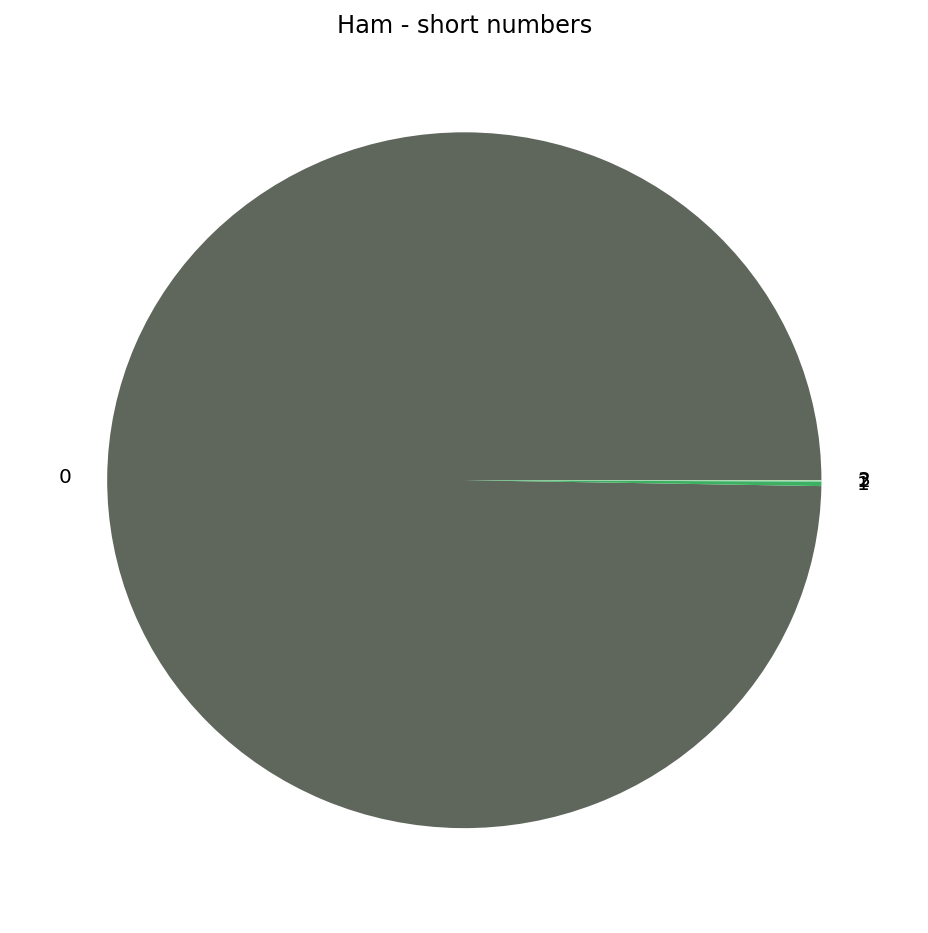

In [25]:
# short Numbers
green_pallete = ['#5f675c','#3db161','#66cdaa','#bee687','#6cdfdc','#d7d7ff','#ffdb00','white']

spam_x = data[data['label']=='spam']['short_number'].value_counts()
spam_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(spam_x,labels=spam_x.index,startangle=0,colors=green_pallete)
pyplot.title("Spam - short numbers")
pyplot.show()

ham_x = data[data['label']=='ham']['short_number'].value_counts()
ham_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(ham_x,labels=ham_x.index, colors=green_pallete)
pyplot.title("Ham - short numbers")
pyplot.show()


In [26]:
#clean our data by removing punctuations/ stopwords and stemming words

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(data):
    
    message = data.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in data.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

data["text"] = data["text"].apply(cleanText)
data.head(n = 10)    

,label,text,label_num,messageLength,len,long_number,short_number,punct,website
0,ham,"go jurong point, crazy.. avail bugi n great wo...",0,111,92,0,0,9.783,0
1,ham,ok lar... joke wif u oni...,0,29,24,0,0,25.000,0
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,1,155,128,1,4,4.688,1
3,ham,u dun say earli hor... u c alreadi say...,0,49,39,0,0,15.385,0
4,ham,"nah think goe usf, live around though",0,61,49,0,0,4.082,0
5,spam,freemsg hey darl 3 week word back! i'd like fu...,1,148,117,0,0,6.838,0
6,ham,even brother like speak me. treat like aid pat...,0,77,62,0,0,3.226,0
7,ham,per request mell mell (oru minnaminungint nuru...,0,160,135,0,0,4.444,0
8,spam,winner!! valu network custom select receivea å...,1,158,133,1,2,4.511,0
9,spam,mobil 11 month more? u r entitl updat latest c...,1,154,126,1,2,1.587,0


In [27]:
#convert clean text into a representation that a machine learning model can understand (this example uses Tfifd)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(data["text"])
print(features.shape)

(5572, 7926)


In [28]:
x_features = pd.concat([data['len'],data['long_number'],data['short_number'],data['punct'],data['website'],
                        pd.DataFrame(features.toarray())],axis=1)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

x_train, x_test, y_train, y_test = train_test_split(x_features,data['label'])

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 7931)
(1393, 7931)
(4179,)
(1393,)


In [32]:
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(x_train,y_train)
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse=True)[0:20]

[(0.12974491849192302, 'short_number'),
 (0.08414212330063844, 'long_number'),
 (0.037505386098750114, 'len'),
 (0.023242823063936737, 3119),
 (0.020036928175317974, 7812),
 (0.019334109478472444, 7260),
 (0.017469059607994167, 351),
 (0.015708711936081823, 1948),
 (0.015151597048015728, 5873),
 (0.0139746029464272, 6958),
 (0.012487151755576803, 6187),
 (0.011410509194463361, 7296),
 (0.010834476567038252, 4696),
 (0.009870535668786857, 5591),
 (0.009705411704327278, 7129),
 (0.008955287340250239, 7693),
 (0.008418333990866484, 6657),
 (0.00835592498467778, 368),
 (0.00784867498639099, 'punct'),
 (0.007245455831718276, 7383)]

*** Need to look at https://stackoverflow.com/questions/36997619/sklearn-stratified-sampling-based-on-a-column 
    And see if we can split based on stratified sampling

In [34]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label='spam', average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'
      .format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))

Precision : 0.994 / Recall : 0.93 / fscore : 0.961 / Accuracy: 0.99


Len + punct *** Precision : 0.557 / Recall : 0.566 / fscore : 0.562 / Acc: 0.89

Len + punct + nums *** Precision : 0.914 / Recall : 0.905 / fscore : 0.909 / Acc: 0.974 (major jump in performance)

rest + website *** Precision : 0.901 / Recall : 0.901 / fscore : 0.901 / Acc: 0.974

All features + tfidf *** Precision : 0.984 / Recall : 0.909 / fscore : 0.945 / Acc: 0.985 (Marginal but very critical jump in precision)

In [35]:
#Multinomial Naive Bayes
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
prediction["Multinomial"] = model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#accuracy_score(y_test,prediction["Multinomial"])

precision,recall,fscore,support =score(y_test,prediction["Multinomial"],pos_label='spam', average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'
      .format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))

#0.9720028715003589

Precision : 0.987 / Recall : 0.812 / fscore : 0.891 / Accuracy: 0.99


In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
prediction["Logistic"] = model.predict(x_test)
#accuracy_score(y_test,prediction["Logistic"])

precision,recall,fscore,support =score(y_test,prediction["Logistic"],pos_label='spam', average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'
      .format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))

Precision : 0.982 / Recall : 0.876 / fscore : 0.926 / Accuracy: 0.99


***** Start Milestone 3 here or Final presenation

In [39]:
print(classification_report(y_test, prediction['Logistic'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.98      1.00      0.99      1207
       Spam       0.98      0.88      0.93       186

avg / total       0.98      0.98      0.98      1393



In [40]:
conf_mat = confusion_matrix(y_test, prediction['Logistic'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print(conf_mat)

[[1204    3]
 [  23  163]]


Text(0.5,15,'Predicted label')

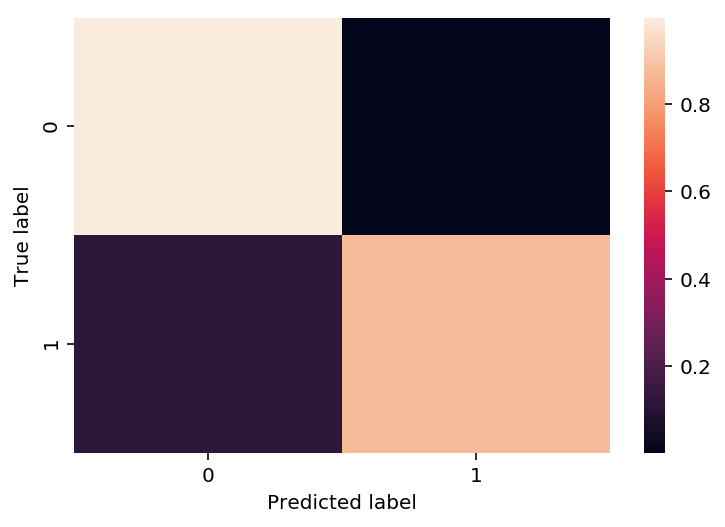

In [41]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [42]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.97      1.00      0.98      1207
       Spam       0.99      0.81      0.89       186

avg / total       0.97      0.97      0.97      1393



In [43]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print(conf_mat)

[[1205    2]
 [  35  151]]


Text(0.5,15,'Predicted label')

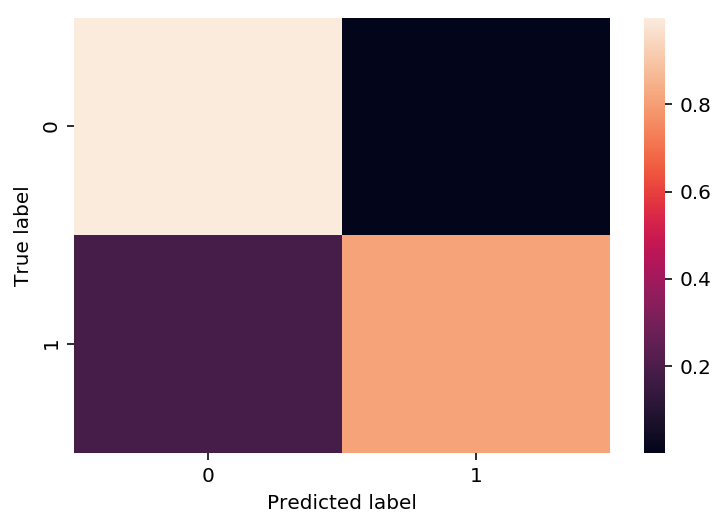

In [44]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [45]:
#increased the pandas dataframe width to display the misclassified texts in full width.
pd.set_option('display.max_colwidth', -1)

In [46]:
# how do i get it back to text?
x_test[y_test < prediction["Multinomial"] ]

,len,long_number,short_number,punct,website,0,1,2,3,4,...,7916,7917,7918,7919,7920,7921,7922,7923,7924,7925
3289,53,0,2,5.66,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,19,0,0,0.00,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
